<a href="https://colab.research.google.com/github/joooser/TENSORFLOW2/blob/main/Tumor_classiffier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/TumorClassification.zip \
    -O /tmp/platzi-tf2/TumorClassification.zip

--2022-06-27 03:28:20--  https://storage.googleapis.com/platzi-tf2/TumorClassification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.195.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7460028 (7.1M) [application/zip]
Saving to: ‘/tmp/platzi-tf2/TumorClassification.zip’

/tmp/platzi-tf2/Tum 100%[===================>]   7.11M  --.-KB/s    in 0.04s   

2022-06-27 03:28:20 (201 MB/s) - ‘/tmp/platzi-tf2/TumorClassification.zip’ saved [7460028/7460028]



In [3]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/TumorClassification.zip \
    -O /tmp/platzi-tf2/TumorClassification.zip

--2022-06-27 03:28:20--  https://storage.googleapis.com/platzi-tf2/TumorClassification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7460028 (7.1M) [application/zip]
Saving to: ‘/tmp/platzi-tf2/TumorClassification.zip’

/tmp/platzi-tf2/Tum 100%[===================>]   7.11M  --.-KB/s    in 0.03s   

2022-06-27 03:28:20 (209 MB/s) - ‘/tmp/platzi-tf2/TumorClassification.zip’ saved [7460028/7460028]



In [4]:
local_zip = "/tmp/platzi-tf2/TumorClassification.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/platzi-tf2")
zip_ref.close()

In [5]:
initial_count = 0
dir = "/tmp/platzi-tf2/Train/NORMAL/"
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
print(initial_count)

350


In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import requests as requests
from PIL import Image
from io import BytesIO
import codecs
import json


In [7]:
train_dir = "/tmp/platzi-tf2/Train"
test_dir = "/tmp/platzi-tf2/Test"

In [8]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.28)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (56, 56),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (56, 56),
    batch_size = 64,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (56, 56),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 1050 images belonging to 3 classes.
Found 39 images belonging to 3 classes.
Found 144 images belonging to 3 classes.


In [10]:
classes = ["BENIGN", "MALIGNANT", "NORMAL"]

In [11]:
classes

['BENIGN', 'MALIGNANT', 'NORMAL']

In [12]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

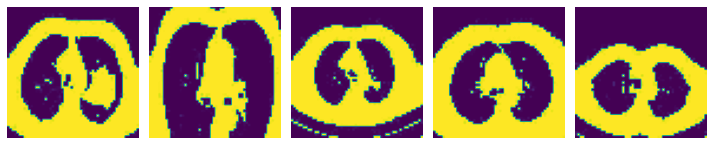

In [13]:
sample_training_images, _= next(train_generator)
plotImages(sample_training_images[10:15])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

In [15]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest',
)

In [16]:
i = 0 
for batch in datagen.flow_from_directory(train_dir, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 10 == 0 :
        break

plt.show()        

Found 1050 images belonging to 3 classes.


ValueError: ignored

<Figure size 432x288 with 0 Axes>

In [18]:
model_base = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (56, 56, 1)),
              tf.keras.layers.Dense(18, activation = "relu"),
              tf.keras.layers.Dense(6, activation = "relu"),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

In [19]:
model_base.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 18)                56466     
                                                                 
 dense_4 (Dense)             (None, 6)                 114       
                                                                 
 dense_5 (Dense)             (None, 3)                 21        
                                                                 
Total params: 56,601
Trainable params: 56,601
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_base.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ['accuracy'])


history = model_base.fit(
    train_generator, 
    epochs= 20, 
    validation_data = validation_generator
)

Epoch 1/20
9/9 [==============================] - 2s 88ms/step - loss: 1.0385 - accuracy: 0.4686 - val_loss: 0.8705 - val_accuracy: 0.5641
Epoch 2/20
9/9 [==============================] - 1s 72ms/step - loss: 0.9140 - accuracy: 0.6219 - val_loss: 0.8119 - val_accuracy: 0.5897
Epoch 3/20
9/9 [==============================] - 1s 95ms/step - loss: 0.8066 - accuracy: 0.6981 - val_loss: 0.7703 - val_accuracy: 0.5897
Epoch 4/20
9/9 [==============================] - 1s 98ms/step - loss: 0.7303 - accuracy: 0.7410 - val_loss: 0.7798 - val_accuracy: 0.5897
Epoch 5/20
9/9 [==============================] - 1s 100ms/step - loss: 0.6373 - accuracy: 0.8333 - val_loss: 0.8035 - val_accuracy: 0.6154
Epoch 6/20
9/9 [==============================] - 1s 68ms/step - loss: 0.5729 - accuracy: 0.8514 - val_loss: 0.8008 - val_accuracy: 0.6154
Epoch 7/20
9/9 [==============================] - 1s 69ms/step - loss: 0.5050 - accuracy: 0.8762 - val_loss: 0.8039 - val_accuracy: 0.6154
Epoch 8/20
9/9 [==========

In [21]:
results = model_base.evaluate(test_generator)

2/2 [==============================] - 0s 17ms/step - loss: 1.0138 - accuracy: 0.5764


In [22]:
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

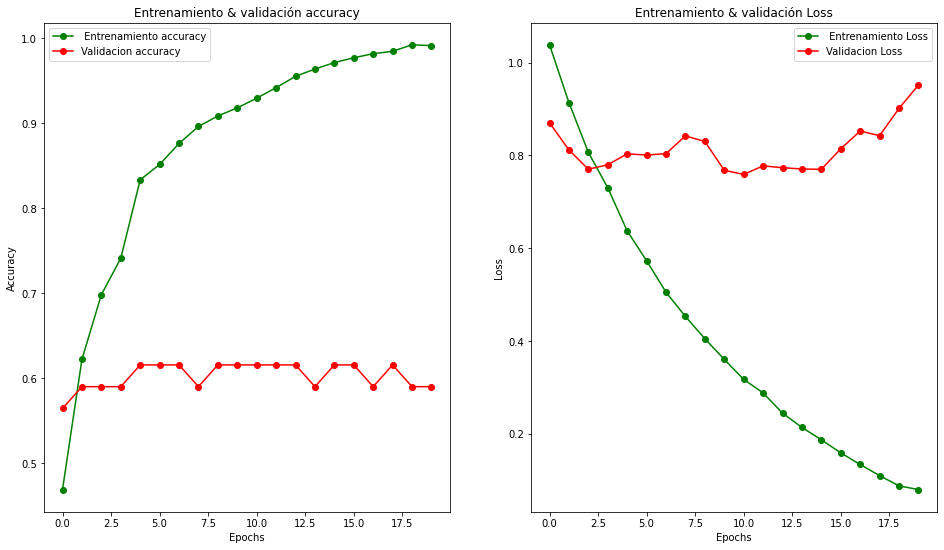

In [23]:
visualizacion_resultados(history)

In [24]:
from tensorflow.keras import regularizers

In [25]:
model_optimizer = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (56, 56, 1)),
              tf.keras.layers.Dense(12, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.3),
              tf.keras.layers.Dense(6, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_optimizer.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_6 (Dense)             (None, 12)                37644     
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_7 (Dense)             (None, 6)                 78        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_8 (Dense)             (None, 3)                 21        
                                                                 
Total params: 37,743
Trainable params: 37,743
Non-trai

In [26]:
model_optimizer.compile(optimizer= "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 40,
    validation_data = validation_generator
)

Epoch 1/40
9/9 [==============================] - 1s 94ms/step - loss: 1.0637 - accuracy: 0.3848 - val_loss: 0.9072 - val_accuracy: 0.3077
Epoch 2/40
9/9 [==============================] - 1s 73ms/step - loss: 0.9722 - accuracy: 0.4600 - val_loss: 0.8796 - val_accuracy: 0.3333
Epoch 3/40
9/9 [==============================] - 1s 81ms/step - loss: 0.9248 - accuracy: 0.4857 - val_loss: 0.8224 - val_accuracy: 0.4615
Epoch 4/40
9/9 [==============================] - 1s 72ms/step - loss: 0.8794 - accuracy: 0.5105 - val_loss: 0.7118 - val_accuracy: 0.6667
Epoch 5/40
9/9 [==============================] - 1s 73ms/step - loss: 0.8657 - accuracy: 0.5343 - val_loss: 0.6315 - val_accuracy: 0.9487
Epoch 6/40
9/9 [==============================] - 1s 70ms/step - loss: 0.8392 - accuracy: 0.5533 - val_loss: 0.6879 - val_accuracy: 0.7179
Epoch 7/40
9/9 [==============================] - 1s 70ms/step - loss: 0.7767 - accuracy: 0.6200 - val_loss: 0.7543 - val_accuracy: 0.4103
Epoch 8/40
9/9 [===========

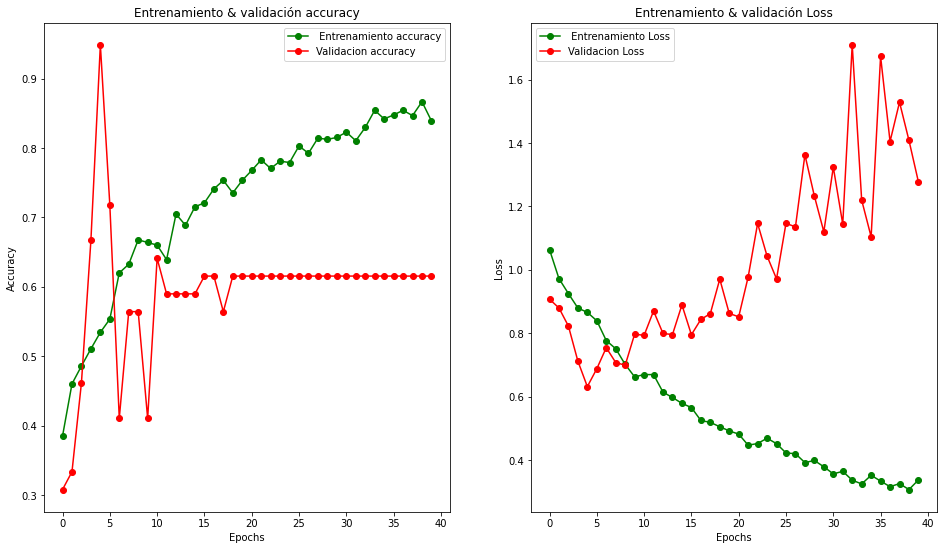

In [27]:
def visualizacion_resultados(history):
  epochs = [i for i in range(40)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

visualizacion_resultados(history_optimizer)

convoluciones


In [31]:
model_convolutional = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(32, (4,4), activation = "relu", input_shape= (56, 56, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.08),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.08),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_convolutional.summary()

model_convolutional.compile(optimizer= "Nadam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_convolutional = model_convolutional.fit(
    train_generator,
    epochs = 40,
    validation_data = validation_generator
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 53, 53, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 21632)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               5538048   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                      

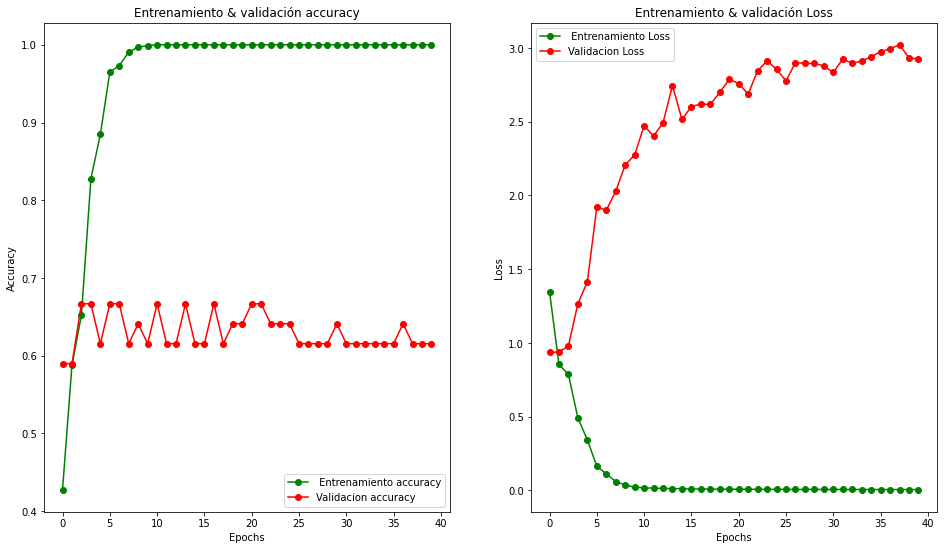

In [32]:
visualizacion_resultados(history_convolutional)

CALLBACKS

In [33]:
model_callback = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (56, 56, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_callback.summary()

model_callback.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 54, 54, 75)        750       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 75)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 54675)             0         
                                                                 
 dense_15 (Dense)            (None, 256)               13997056  
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                      

In [34]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.999:
      print("Lo logramos, nuestro modelo llego a 95%, detenemos el entrenamiento")
      self.model.stop_training = True

In [35]:
callback = TrainingCallback()

history_callback = model_callback.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback],
    validation_data = validation_generator
)

Epoch 1/20
9/9 [==============================] - 8s 767ms/step - loss: 2.0122 - accuracy: 0.3943 - val_loss: 0.9136 - val_accuracy: 0.6410
Epoch 2/20
9/9 [==============================] - 8s 858ms/step - loss: 1.0317 - accuracy: 0.5181 - val_loss: 0.8152 - val_accuracy: 0.5897
Epoch 3/20
9/9 [==============================] - 8s 889ms/step - loss: 0.8206 - accuracy: 0.6419 - val_loss: 0.7797 - val_accuracy: 0.5897
Epoch 4/20
9/9 [==============================] - 8s 840ms/step - loss: 0.6756 - accuracy: 0.7114 - val_loss: 0.8331 - val_accuracy: 0.5641
Epoch 5/20
9/9 [==============================] - 7s 746ms/step - loss: 0.5378 - accuracy: 0.7971 - val_loss: 0.8993 - val_accuracy: 0.6154
Epoch 6/20
9/9 [==============================] - 7s 747ms/step - loss: 0.3835 - accuracy: 0.8714 - val_loss: 1.0041 - val_accuracy: 0.6410
Epoch 7/20
9/9 [==============================] - 7s 835ms/step - loss: 0.2729 - accuracy: 0.9133 - val_loss: 1.0998 - val_accuracy: 0.6154
Epoch 8/20
9/9 [====

In [36]:
def get_model():
  model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (56, 56, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
  ])
  return model

model_early = get_model()
model_early.summary()

model_early.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 54, 54, 75)        750       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 75)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 54675)             0         
                                                                 
 dense_18 (Dense)            (None, 256)               13997056  
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                      

early stopping

In [37]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience=3, mode = "auto")

In [38]:
history_early = model_early.fit(
    train_generator, 
    epochs= 20, 
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/20
9/9 [==============================] - 8s 761ms/step - loss: 2.0031 - accuracy: 0.3552 - val_loss: 0.8738 - val_accuracy: 0.3333
Epoch 2/20
9/9 [==============================] - 7s 800ms/step - loss: 1.0340 - accuracy: 0.4838 - val_loss: 0.8008 - val_accuracy: 0.5641
Epoch 3/20
9/9 [==============================] - 7s 726ms/step - loss: 0.8645 - accuracy: 0.5914 - val_loss: 0.8629 - val_accuracy: 0.5385
Epoch 4/20
9/9 [==============================] - 7s 726ms/step - loss: 0.7485 - accuracy: 0.6790 - val_loss: 0.8569 - val_accuracy: 0.5897
Epoch 5/20
9/9 [==============================] - 7s 728ms/step - loss: 0.5782 - accuracy: 0.7695 - val_loss: 0.9448 - val_accuracy: 0.5897
Epoch 6/20
9/9 [==============================] - 7s 726ms/step - loss: 0.4425 - accuracy: 0.8419 - val_loss: 1.0416 - val_accuracy: 0.6154
Epoch 7/20
9/9 [==============================] - 7s 733ms/step - loss: 0.3081 - accuracy: 0.9038 - val_loss: 1.1874 - val_accuracy: 0.6410
Epoch 8/20
9/9 [====

## Creamos nuestra modelo funcional con Auto Tunner Keras

In [39]:
!pip install -q -U keras-tuner
import keras_tuner as kt
from tensorflow import keras

     |████████████████████████████████| 133 kB 5.2 MB/s 


In [40]:
def constructor_modelos(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(64, (3,3), activation= "relu", input_shape = (56, 56, 1)))
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Flatten())

  hp_units = hp.Int("units", min_value = 32, max_value = 512, step = 32)
  model.add(tf.keras.layers.Dense(units=hp_units,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(128,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.4))
  model.add(tf.keras.layers.Dense(len(classes), activation = "softmax"))

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate),loss = "categorical_crossentropy", metrics = ["accuracy"])

  return model

In [41]:
tuner = kt.Hyperband(
    constructor_modelos,
    objective = "val_accuracy",
    max_epochs = 30,
    factor = 3,
    directory = "models/",
    project_name = "tunner")

In [ ]:
tuner.search(train_generator, epochs =50, validation_data = validation_generator)

best_hps = tuner.get_best_hyperparameters(num_trials =5)[0]

Trial 6 Complete [00h 00m 16s]
val_accuracy: 0.38461539149284363

Best val_accuracy So Far: 0.6410256624221802
Total elapsed time: 00h 01m 25s

Search: Running Trial #7

Value             |Best Value So Far |Hyperparameter
352               |160               |units
0.01              |0.001             |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
9/9 [==============================] - 8s 807ms/step - loss: 8.7644 - accuracy: 0.3914 - val_loss: 1.2387 - val_accuracy: 0.6410


In [ ]:
print(best_hps.get("units"))

In [ ]:
print(best_hps.get("learning_rate"))

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

history_hypermodel = hypermodel.fit(
    train_generator,
    epochs = 50,
    callbacks = [callback_early],
    validation_data = validation_generator
)

## Guardar únicamente arquitectura del modelo

In [ ]:
config_dict = hypermodel.get_config()

In [ ]:
print(config_dict)

## Crear un nuevo modelo desde la arquitectura

In [ ]:
model_same_config = tf.keras.Sequential.from_config(config_dict)

In [ ]:
model_same_config.summary()

## Guardar y cargar unicamente los pesos


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model_weight = get_model()
model_weight.summary()

In [ ]:
model_weight.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# Creamos unos checkpoint de nuestros modelos con TensorFlow, verbose: mostrar mas información
checkpoint_path = "model_checpoints/checkpoint"
checkpoint_weighs= ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weights_only = True,
    verbose = 1

)

In [ ]:
# Entrenamos el modelo, y almacenamos en cada steps los pesos del moedelo.
history_weight = model_weight.fit(
    train_generator,
    epochs = 20,
    callbacks = [checkpoint_weighs],
    validation_data = validation_generator
)


#### Guardamos los pesos de forma manual

In [ ]:
model_weight.save_weights("model_manul/my_model")

#### Creamos la arquitectura y cargamos los pesos

In [ ]:
model_weights2 = get_model()
model_weights2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
model_weights2.load_weights(checkpoint_path)


In [ ]:
model_weights2.evaluate(test_generator)

57/57 [==============================] - 5s 91ms/step - loss: 0.7784 - accuracy: 0.8543


[0.7783836722373962, 0.85429447889328]

In [ ]:
model_weight.evaluate(test_generator)

57/57 [==============================] - 2s 40ms/step - loss: 0.7784 - accuracy: 0.8543


[0.7783834934234619, 0.85429447889328]